In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf

In [72]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
import numpy as np
import pandas as pd
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D

In [73]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

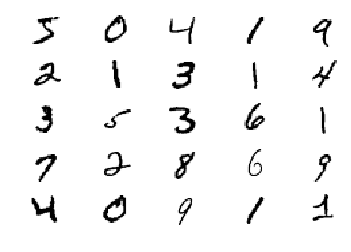

In [74]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [109]:
img_rows, img_cols = 28, 28

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def prep(x, y):
    out_y = keras.utils.to_categorical(y, 10)
    
    shaped_array = x.reshape(-1, 28, 28, 1)
    preped_x = sigmoid(shaped_array)
    return preped_x, out_y

In [110]:
xtr, ytr = prep(xtrain, ytrain)

xte, yte = prep(xtest, ytest)

/home/kat/anaconda3/envs/deepl/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [111]:
xtr.shape

(60000, 28, 28, 1)

In [112]:
xte.shape

(10000, 28, 28, 1)

In [127]:
model = Sequential()
model.add(Conv2D(100, kernel_size=(3,3), activation='relu', data_format='channels_last', input_shape=(28, 28, 1)))
model.add(Conv2D(20, kernel_size=(3,3), activation='relu', data_format='channels_last'))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 100)       1000      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 20)        18020     
_________________________________________________________________
flatten_14 (Flatten)         (None, 11520)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                576050    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                510       
Total params: 595,580
Trainable params: 595,580
Non-trainable params: 0
_________________________________________________________________


In [128]:
ytrain.shape

(60000,)

In [129]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [130]:
model.fit(xtr, ytr, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 379s 6ms/step - loss: 0.2023 - acc: 0.9375
Epoch 2/10
60000/60000 [==============================] - 379s 6ms/step - loss: 0.0720 - acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 377s 6ms/step - loss: 0.0482 - acc: 0.9848
Epoch 4/10
60000/60000 [==============================] - 373s 6ms/step - loss: 0.0339 - acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 372s 6ms/step - loss: 0.0240 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 379s 6ms/step - loss: 0.0171 - acc: 0.9944
Epoch 7/10
60000/60000 [==============================] - 379s 6ms/step - loss: 0.0138 - acc: 0.9952
Epoch 8/10
60000/60000 [==============================] - 376s 6ms/step - loss: 0.0108 - acc: 0.9963
Epoch 9/10
60000/60000 [==============================] - 374s 6ms/step - loss: 0.0084 - acc: 0.9972
Epoch 10/10
60000/60000 [==============================] - 385s 6ms/step - loss: 0.0083 - a

In [139]:
# model.evaluate(x=xte, y=yte)

10000/10000 [==============================] - 21s 2ms/step


[0.0872821976552932, 0.9814]

In [141]:
ypred = model.predict(xte)

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
confusion_matrix(yte, ypred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [153]:
ytest.shape

(10000,)

In [152]:
yte.shape

(10000, 10)

In [160]:
ypred = keras.utils.to_categorical(ypred, 10)
ypred = ypred.astype(int)
ypred

array([[[[[1, 0, 0, ..., 0, 0, 0],
          [0, 1, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          ...,
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0]],

         [[0, 1, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          ...,
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0]],

         [[0, 1, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          ...,
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0]],

         ...,

         [[0, 1, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          ...,
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0]],

         [[0, 1, 0, ..., 0, 0, 0],
          [1, 0, 0, ..., 0, 0, 0],
       

In [ ]:
from numpy import argmax
from keras.utils.np_utils import to_categorical

argmax(to_categorical(ypred, 10, dtype='int'))